# Global rate and effectiveness of COVID Vaccinations 🦠

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
import pandas as pd
import os

import pathlib
import urllib.request
from ipywidgets import interact, FloatSlider

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.rc('figure', dpi=100, figsize=(8, 5))
plt.rc('font', size=12)

In [ ]:
from project import *

Data science has been an important tool in understanding the development of the COVID-19 pandemic. In this project, we'll take a took at two real-world datasets that measure vaccination rates and effectiveness.
---

The file `data/covid_vaccinations_updated.csv` contains information on the number of COVID vaccinations that have been administered in various countries and regions of the world, as of April 7th, 2022:

In [ ]:
vacs = pd.read_csv(os.path.join('data', 'covid_vaccinations_updated.csv'))
vacs

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Province_State
0,Afghanistan,2021-02-22,0,0.0,0.0,2021-02-22,4.0,NaN
1,Afghanistan,2021-02-23,0,0.0,0.0,2021-02-23,4.0,NaN
2,Afghanistan,2021-02-24,0,0.0,0.0,2021-02-24,4.0,NaN
3,Afghanistan,2021-02-25,0,0.0,0.0,2021-02-25,4.0,NaN
4,Afghanistan,2021-02-26,0,0.0,0.0,2021-02-26,4.0,NaN
...,...,...,...,...,...,...,...,...
197387,Zimbabwe,2022-04-03,7684182,5517779.0,3561400.0,2022-04-04,716.0,NaN
197388,Zimbabwe,2022-04-04,7684182,5517779.0,3561400.0,2022-04-05,716.0,NaN
197389,Zimbabwe,2022-04-05,9694465,5562437.0,3570255.0,2022-04-06,716.0,NaN
197390,Zimbabwe,2022-04-06,9807529,5589007.0,3572995.0,2022-04-07,716.0,NaN


<a name='part1'></a>

## Part 1: Global Vaccination Rates 🌎

One question we might hope to answer with this data is, **which countries have the highest vaccination rates?** Unfortunately, the messiness of real-world data means that answering even this simple question requires a bit of cleaning and organization. We'll do this cleaning and organization in the next few questions.

First, we need to find the total number of vaccinated individuals in each country/region. To do this, we have to understand what the values in the `'Doses_admin'` column mean. Are they the number of doses administered on *that day*? Or are they the *cumulative* number of doses administered? This can be answered with a plot.

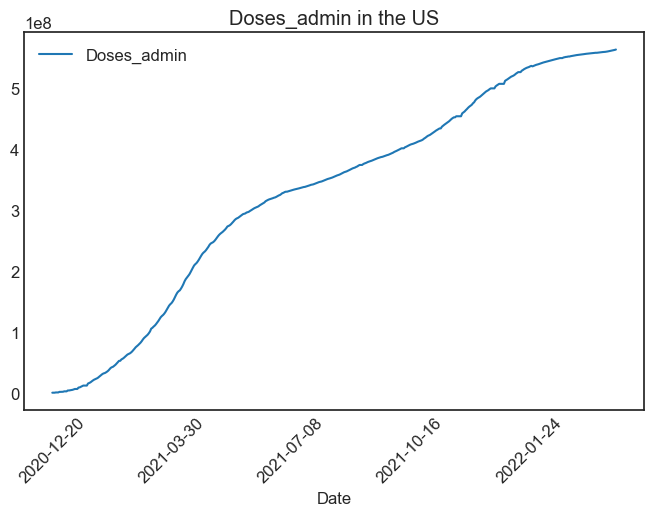

In [ ]:
vacs[vacs['Country_Region'] == 'US'].plot(x='Date', y='Doses_admin')
plt.title('Doses_admin in the US')
plt.xticks(rotation=45);

Since the curve is always increasing, this plot suggests that the `'Doses_admin'` column contains the *cumulative* number of doses administered, and this is indeed what the column is *supposed* to be. However, you shouldn't *assume* that the reported vaccination rates are actually cumulative. For example, let's look at the plot for Afghanistan:

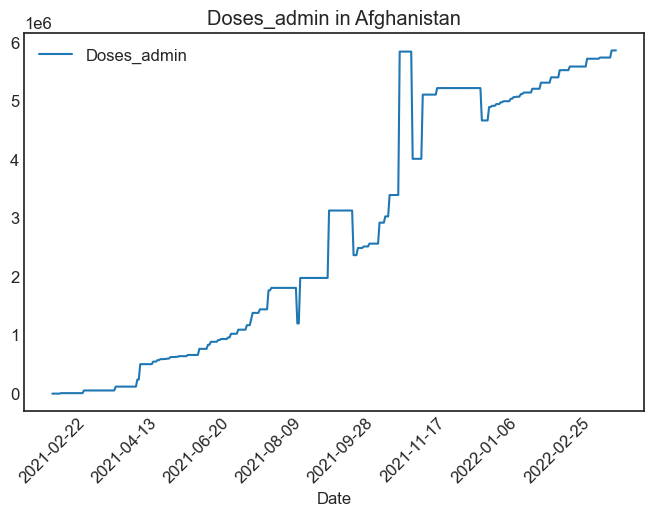

In [ ]:
vacs[vacs['Country_Region'] == 'Afghanistan'].plot(x='Date', y='Doses_admin')
plt.title('Doses_admin in Afghanistan')
plt.xticks(rotation=45);

Notice the dips in the graph? Unless there were *negative* doses administered (which would be awkward), we must conclude that the data is messy - there will be instances where, either due to errors in reporting or in recording, the cumulative number of doses actually *decreases* from one day to the next.

### Question 1 (Checkpoint Question)

Let's explore whether the messiness seen above is common.

#### `is_monotonic`

Create a function named `is_monotonic` which accepts a 1D `numpy` array and returns `True` if every entry in the array (except the first) is greater than or equal to the previous entry, and `False` otherwise.

<br>

#### `monotonic_by_country`

Create a function named `monotonic_by_country` which accepts a DataFrame like `vacs` and returns a DataFrame with one row for each country and three `bool` columns – `'Doses_admin_monotonic'`, `'People_partially_vaccinated_monotonic'`, and `'People_fully_vaccinated_monotonic'`. An entry in the `'Doses_admin'` column should be `True` if the country's `'Doses_admin'` is monotonically increasing and `False` otherwise; likewise for the other columns. The index of the returned DataFrame should contain country names.

In [9]:
vacs

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Province_State
0,Afghanistan,2021-02-22,0,0.0,0.0,2021-02-22,4.0,NaN
1,Afghanistan,2021-02-23,0,0.0,0.0,2021-02-23,4.0,NaN
2,Afghanistan,2021-02-24,0,0.0,0.0,2021-02-24,4.0,NaN
3,Afghanistan,2021-02-25,0,0.0,0.0,2021-02-25,4.0,NaN
4,Afghanistan,2021-02-26,0,0.0,0.0,2021-02-26,4.0,NaN
...,...,...,...,...,...,...,...,...
197387,Zimbabwe,2022-04-03,7684182,5517779.0,3561400.0,2022-04-04,716.0,NaN
197388,Zimbabwe,2022-04-04,7684182,5517779.0,3561400.0,2022-04-05,716.0,NaN
197389,Zimbabwe,2022-04-05,9694465,5562437.0,3570255.0,2022-04-06,716.0,NaN
197390,Zimbabwe,2022-04-06,9807529,5589007.0,3572995.0,2022-04-07,716.0,NaN


In [ ]:
def is_monotonic(arr):
    """
    Given a numpy array of numbers, determines if each entry is >= than the previous.
    
    Example
    -------
    
    >>> is_monotonic(np.array([3, 6, 2, 8]))
    False
    
    """
    return (np.diff(arr) >= 0).all()


def monotonic_by_country(vacs):
    """
    Given a DataFrame like `vacs`, returns a DataFrame with one row for each country and 
    three bool columns - 'Doses_admin_monotonic', 'People_partially_vaccinated_monotonic', and 
    'People_fully_vaccinated_monotonic'. An entry in the 'Doses_admin' column should be True if the 
    country's Doses_admin is monotonically increasing and False otherwise; likewise for the other
    columns. The index of the returned DataFrame should contain country names.
    
    Example
    -------
    
    >>> # this file contains a subset of `vacs`
    >>> subset_vacs = pd.read_csv(os.path.join('data', 'covid-vaccinations-subset.csv'))
    >>> result = monotonic_by_country(subset_vacs)
    >>> isinstance(result, pd.DataFrame)
    True
    >>> result.shape == (2, 3)
    True
    >>> result.loc['Venezuela', 'Doses_admin_monotonic'] == False
    True
    
    """
    vacs_copy = vacs.copy()
    result = vacs_copy.groupby("Country_Region").agg({'Doses_admin': is_monotonic, "People_partially_vaccinated": is_monotonic, "People_fully_vaccinated": is_monotonic})
    result.columns = ["Doses_admin_monotonic", "People_partially_vaccinated_monotonic", "People_fully_vaccinated_monotonic"]
    return result

We'd like to get the total number of doses administered, people partially vaccinated, and people fully vaccinated for each country. If the data were truly monotonic, we could simply group by country and find the maximum within each group and within each column – this would be the overall cumulative total. However, if the data has errors that make it not monotonically increasing, there could be a noisy "spike" in the graph, so that the maximum may be an unfaithful measure of the total number of doses. Instead of the maximum, we should use something more robust, such as **the 97th percentile**.

Create a function named `robust_totals` that accepts a DataFrame like `vacs` and returns a DataFrame with one row for each country and three columns – `'Doses_admin'`, `'People_partially_vaccinated'`, and `'People_fully_vaccinated'`. The `'Doses_admin'` column should contain the 97th percentile of the `'Doses_admin'` values for each country; likewise for the other columns. The index of the returned DataFrame should contain country names.

In [111]:
def percentile_97th(arr):
    return np.percentile(arr, 97)

In [ ]:

def robust_totals(vacs):
    """
    Accepts a DataFrame like vacs above and returns a DataFrame with one row for each 
    country/region and three columns - Doses_admin, People_partially_vaccinated, and 
    People_fully_vaccinated - where an entry in the Doses_admin column is the 97th 
    percentile of the values in that column for that country; likewise for the other 
    columns. The index of the returned DataFrame should contain country names.
    
    Example
    -------
    
    >>> # this file contains a subset of `vacs`
    >>> subset_vacs = pd.read_csv(os.path.join('data', 'covid-vaccinations-subset.csv'))
    >>> subset_tots = robust_totals(subset_vacs)
    >>> isinstance(subset_tots, pd.DataFrame)
    True
    >>> subset_tots.shape
    (2, 3)
    >>> int(subset_tots.loc['Venezuela', 'Doses_admin'])
    15714857
    
    """
    def percentile_97th(arr):
        return np.percentile(arr, 97)
    vacs_copy = vacs.copy()
    result = vacs_copy.groupby("Country_Region").agg({'Doses_admin': percentile_97th, "People_partially_vaccinated": percentile_97th, "People_fully_vaccinated": percentile_97th})
    return result

We'd like to compute for each country the number of people vaccinated as a percentage of the total population. To this end, we have downloaded a CSV file containing the population of every country in the world:

In [16]:
pops_raw = pd.read_csv(os.path.join('data', 'populations.csv'))
pops_raw

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,"1,440,297,825",0.39 %,5540090,153,"9,388,211","-348,399.0",1.7,38,61 %,18.47 %
1,India,"1,382,345,085",0.99 %,13586631,464,"2,973,190","-532,687.0",2.2,28,35 %,17.70 %
2,United States,"331,341,050",0.59 %,1937734,36,"9,147,420","954,806.0",1.8,38,83 %,4.25 %
3,Indonesia,"274,021,604",1.07 %,2898047,151,"1,811,570","-98,955.0",2.3,30,56 %,3.51 %
4,Pakistan,"221,612,785",2.00 %,4327022,287,"770,880","-233,379.0",3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,"4,993",0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,"3,497",3.05 %,103,0,"12,170",NaN,N.A.,N.A.,66 %,0.00 %
232,Niue,"1,628",0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
233,Tokelau,"1,360",1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %


Unfortunately, this DataFrame's data types require some cleaning. All of the columns except the first are numeric and should either be integers or floats, as appropriate, but many of them are being stored as strings. Additionally, some rows have missing values.

Create a function named `fix_dtypes` which accepts a DataFrame like `pops_raw` above and returns a DataFrame with exactly the same columns and rows, but with the data types "fixed" to be appropriate for the data contained within. In addition, ensure that all missing values are represented by `np.NaN`. All percentages should be represented as decimals – e.g., 27% should be 0.27.

In [17]:
pops_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Country (or dependency)  235 non-null    object
 1   Population (2020)        235 non-null    object
 2   Yearly Change            235 non-null    object
 3   Net Change               235 non-null    int64 
 4   Density (P/Km²)          235 non-null    int64 
 5   Land Area (Km²)          235 non-null    object
 6   Migrants (net)           201 non-null    object
 7   Fert. Rate               235 non-null    object
 8   Med. Age                 235 non-null    object
 9   Urban Pop %              235 non-null    object
 10  World Share              235 non-null    object
dtypes: int64(2), object(9)
memory usage: 20.3+ KB


In [ ]:
def fix_dtypes(pops_raw):
    """
    Accepts a DataFrame like pops_raw above and returns a DataFrame with exactly
    the same columns and rows, but with the data types "fixed" to be appropriate
    for the data contained within. In addition, ensure that all missing values are
    represented by np.NaN. All percentages should be represented as decimals – e.g.,
    27% should be 0.27.
    
    Example
    -------
    
    >>> pops_raw = pd.read_csv(os.path.join('data', 'populations.csv'))
    >>> pops = fix_dtypes(pops_raw)
    >>> isinstance(pops, pd.DataFrame)
    True
    >>> pops.shape
    (235, 11)
    >>> pops.loc[pops['Country (or dependency)'] == 'Montserrat', 'Population (2020)'].iloc[0]
    4993
    
    """
    pops_raw_copy = pops_raw.copy()
    num_col_name = pops_raw.columns[1:]
    for col in num_col_name:
        if (pops_raw_copy[col].dtype != 'int64') & (pops_raw_copy[col].dtype != 'float64'):    
            if pops_raw_copy[col].str.contains("%").any():
                pops_raw_copy[col] = pops_raw_copy[col].str.strip("%")
                pops_raw_copy[col] = pd.to_numeric(pops_raw_copy[col], errors='coerce')/100
            elif pops_raw_copy[col].str.contains(",").any():
                pops_raw_copy[col] = pops_raw_copy[col].str.replace(',', '')
                if pops_raw_copy[col].str.isdigit().all():
                    pops_raw_copy[col] = pops_raw_copy[col].astype(int)
                else:
                    pops_raw_copy[col] = pops_raw_copy[col].astype(float)
                
            elif pops_raw_copy[col].str.isdigit().all():
                pops_raw_copy[col] = pops_raw_copy[col].astype(int)
                
            else:
                pops_raw_copy[col] = pd.to_numeric(pops_raw_copy[col], errors='coerce')
    return pops_raw_copy

Our goal is to compute the percentage of people vaccinated in each country. Our next step is to take the population numbers from the previous problem and insert them into the DataFrame of vaccination numbers (`tots`). In theory this is a simple `concat` or `merge`, but there's a problem: the names of the countries are not always the same in each DataFrame.

In [ ]:
def missing_in_pops(tots, pops):
    """
    Takes in two DataFrames, the first, like tots above, containing the total number of
    vaccinations per country, and the second like pops above, containing the
    population of each country. It should return a Python set of names that appear
    in tots but not in pops.
    
    Example
    -------
    >>> tots = pd.DataFrame({
    ...         'Doses_admin': [1, 2, 3],
    ...         'People_partially_vaccinated': [1, 2, 3],
    ...         'People_fully_vaccinated': [1, 2, 3]
    ...     },
    ...     index = ['China', 'Angola', 'Republic of Data Science']
    ... )
    >>> pops_raw = pd.read_csv(os.path.join('data', 'populations.csv'))
    >>> pops = fix_dtypes(pops_raw)
    >>> missing = missing_in_pops(tots, pops)
    >>> isinstance(missing, set)
    True
    >>> missing
    {'Republic of Data Science'}
    """
    return set(tots.index[~tots.index.isin(pops['Country (or dependency)'])])

    
def fix_names(pops):
    """
    Accepts one argument - a DataFrame like pops – and returns a copy of pops, but with the 
    'Country (or dependency)' column changed so that all countries that appear in tots 
    also appear in the result, with a few exceptions listed in the notebook.
    
    Example
    -------
    
    >>> pops_raw = pd.read_csv(os.path.join('data', 'populations.csv'))
    >>> pops = fix_dtypes(pops_raw)
    >>> pops_fixed = fix_names(pops)
    >>> isinstance(pops_fixed, pd.DataFrame)
    True
    >>> pops_fixed.shape
    (235, 11)
    >>> 'Burma' in pops_fixed['Country (or dependency)'].values
    True
    >>> not 'Myanmar' in pops_fixed['Country (or dependency)'].values
    True
    
    """
    pops_copy = pops.copy()
    country_dict = {'South Korea': 'Korea, South', 'DR Congo': 'Congo (Kinshasa)', 'Congo': 'Congo (Brazzaville)',
               'United States': 'US', 'Czech Republic (Czechia)': 'Czechia', 'Saint Kitts & Nevis': 'Saint Kitts and Nevis',
               'St. Vincent & Grenadines': 'Saint Vincent and the Grenadines', 'Sao Tome & Principe': 'Sao Tome and Principe',
               "Côte d'Ivoire": "Cote d'Ivoire", 'Myanmar':'Burma', 'State of Palestine':'West Bank and Gaza'}
    pops_copy['Country (or dependency)'].replace(country_dict, inplace=True)
    return pops_copy

Create a function named `top_k_fully_vaccinated` that accepts three arguments: a DataFrame like `tots`, a DataFrame like `pops_fixed`, and an integer, `k`, and returns a Series of the $k$ top vaccination rates of any country, sorted in descending order. For the purposes of this question, we define vaccination rate to be the number of fully vaccinated individuals divided by the total population. 

In [ ]:
def top_k_fully_vaccinated(tots, pops_fixed, k):
    """
    Accepts three arguments: a DataFrame like `tots`, a DataFrame like `pops_fixed`, 
    and an integer, `k`, and returns a Series of the $k$ top vaccination rates of any country, 
    sorted in descending order. For the purposes of this question, we define vaccination rate 
    to be the number of fully vaccinated individuals divided by the total population. 
    The index of the Series should be the country name, and the rates 
    should be decimal numbers between 0 and 1.
    
    Example
    -------
    
    >>> # this file contains a subset of `tots`
    >>> tots_sample = pd.read_csv(os.path.join('data', 'tots_sample_for_tests.csv')).set_index('Country_Region')
    >>> pops_raw = pd.read_csv(os.path.join('data', 'populations.csv'))
    >>> pops = fix_dtypes(pops_raw)
    >>> pops_fixed = fix_names(pops)
    >>> top_k_fully_vaccinated(tots_sample, pops_fixed, 3).index[2]
    'Oman'
    """
    just_full_vax = tots[['People_fully_vaccinated']]
    just_pops = pops_fixed.set_index('Country (or dependency)')[['Population (2020)']]
    combined = just_full_vax.merge(just_pops, left_index=True, right_index=True, how='inner')
    vax_rate_series = (combined['People_fully_vaccinated']/combined['Population (2020)']).sort_values(ascending=False).clip(0,1)
    return vax_rate_series.iloc[:k]

In [176]:
# run this to see the result, and don't change this cell -- it is used by the tests
top_k = top_k_fully_vaccinated(tots, pops_fixed, 10)
top_k

Malta                   1.000000
United Arab Emirates    0.967983
Brunei                  0.924083
Portugal                0.923824
Chile                   0.906013
Qatar                   0.896619
Cuba                    0.875327
Singapore               0.855566
Iceland                 0.848994
Cambodia                0.830611
dtype: float64

---

<a name='part2'></a>

## Part 2: Vaccine Effectiveness 💉

There has naturally been much interest in the effectiveness of COVID-19 vaccines. In particular, recent reports suggest that the effectiveness of vaccines – and the Pfizer vaccine in particular – may decrease over time. While this is true, the public perception of declining vaccine effectiveness has been affected by what is often a poor use of statistics by media outlets.

For example, take the following blurb from [this article](https://www.cbc.ca/news/world/israel-covid-delta-variant-booster-1.6159472) on the Canadian Broadcasting Corporation's website (emphasis added):

> Meanwhile, Israeli health officials reported what appeared to be a waning efficacy of the vaccine, including among those who had been double vaccinated. **Data showed that of the serious cases being admitted to hospital, around 60 per cent of patients were people who had been fully vaccinated**, though most were over 60 or with underlying health conditions.

This stat sounds terrible – if you're sick in a hospital bed with COVID-19, you're actually more likely to be vaccinated than not! If you're not a data scientist, you might come away with the conclusion that the vaccine is no longer effective against serious illness, or – even worse – that getting the vaccine will **increase** your risk of sickness. Of course, this statistic by itself is actually meaningless. For instance, imagine a world in which 100% of people are vaccinated. Then 100% of people admitted to the hospital will be vaccinated, too! In Question 8, we will explain the theory behind **vaccine effectiveness**, a statistic that more meaningfully measures the improvement in outcomes for vaccinated individuals over unvaccinated individuals.

To start, let's load in some data. For this project, we'll work with a dataset of vaccine effectiveness in Israel through mid-summer 2021. The vaccination and hospitalization records in the dataset are real. Israel was mostly vaccinated using the Pfizer vaccine, and was one of the first places where lots of data on the Delta variant was gathered.

In [178]:
# Download Israeli COVID vaccinations data from the ☁️
if not pathlib.Path(os.path.join('data', 'israel.csv')).exists():
    urllib.request.urlretrieve(
        'https://f000.backblazeb2.com/file/dsc-data/covid-israel/israel.csv',
        os.path.join('data', 'israel.csv')
    )

In [179]:
israel_raw = pd.read_csv(os.path.join('data', 'israel.csv'))
israel_raw

,Age,Vaccinated,Severe Sickness
0,23,1,0
1,60,1,0
2,43,1,0
3,40,1,0
4,71,1,0
...,...,...,...
6937537,14,1,0
6937538,30,1,0
6937539,18,0,0
6937540,45,1,0


Each row in the dataset is a person. Some are vaccinated (marked with a 1 in the "Vaccinated" column), and some became severely ill (marked with a 1 in the "Severe Sickness" column).

As always, we will first check that the data is clean.

In [180]:
israel_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6937542 entries, 0 to 6937541
Data columns (total 3 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Age              object
 1   Vaccinated       int64 
 2   Severe Sickness  int64 
dtypes: int64(2), object(1)
memory usage: 158.8+ MB


If you look at the data types of each column in `israel_raw`, you'll see that the `'Age'` column has a `dtype` of `object`. If you investigate further, you will see that a special value has been used to indicate that some ages are missing. Write a function named `clean_israel_data` that accepts a DataFrame like `israel_raw` and returns a *new* DataFrame where the missing ages are replaced by `np.NaN`s and the `'Age'` column's data type is `float`. Furthermore, the `'Vaccinated'` and `'Severe Sickness'` columns should be stored as `bool`s. The shape of the returned DataFrame should be the same as `israel_raw`, and, as usual, your function should not modify the input DataFrame.

In [181]:
israel_raw_copy = israel_raw.copy()
israel_raw_copy["Age"] = israel_raw_copy["Age"].replace('-', np.NaN).astype(float)
israel_raw_copy["Vaccinated"] = israel_raw_copy["Vaccinated"].apply(bool)
israel_raw_copy["Severe Sickness"] = israel_raw_copy["Severe Sickness"].apply(bool)
israel_raw_copy

,Age,Vaccinated,Severe Sickness
0,23.0,True,False
1,60.0,True,False
2,43.0,True,False
3,40.0,True,False
4,71.0,True,False
...,...,...,...
6937537,14.0,True,False
6937538,30.0,True,False
6937539,18.0,False,False
6937540,45.0,True,False


In [ ]:
def clean_israel_data(df):
    """
    Accepts a DataFrame like israel_raw and returns a new DataFrame where the missing
    ages are replaced by np.NaNs and the 'Age' column's data type is float. Furthermore,
    the 'Vaccinated' and 'Severe Sickness' columns should be stored as bools. The shape
    of the returned DataFrame should be the same as israel_raw, and, as usual, your
    function should not modify the input argument.
    
    Example
    -------
    
    >>> # this file contains a subset of israel.csv
    >>> israel_raw = pd.read_csv(os.path.join('data', 'israel-subset.csv'))
    >>> result = clean_israel_data(israel_raw)
    >>> isinstance(result, pd.DataFrame)
    True
    >>> str(result.dtypes['Age'])
    'float64'
    
    """
    israel_raw_copy = df.copy()
    israel_raw_copy["Age"] = israel_raw_copy["Age"].replace('-', np.NaN).astype(float)
    israel_raw_copy["Vaccinated"] = israel_raw_copy["Vaccinated"].apply(bool)
    israel_raw_copy["Severe Sickness"] = israel_raw_copy["Severe Sickness"].apply(bool)
    return israel_raw_copy

In [182]:
# run this to see the result, and don't change this cell -- it is used by the tests
israel = clean_israel_data(israel_raw)
israel

,Age,Vaccinated,Severe Sickness
0,23.0,True,False
1,60.0,True,False
2,43.0,True,False
3,40.0,True,False
4,71.0,True,False
...,...,...,...
6937537,14.0,True,False
6937538,30.0,True,False
6937539,18.0,False,False
6937540,45.0,True,False


We now need to decide what to do with the missing values in the `'Age'` column. Can we simply drop those rows? First, let's look at whether the missing values might be MCAR, NMAR, missing by design, etc. We'll first check to see if the distribution of the other columns differs depending on whether the ages are missing or not:

In [49]:
israel.assign(null_age=israel['Age'].isna()).groupby('null_age').mean()

,Age,Vaccinated,Severe Sickness
null_age,,,
False,41.036,0.812204,0.000074
True,NaN,0.805164,0.000000


Because the vaccination rate and severe sickness rate appear to be about the same, whether or not `'Age'` is missing, we hypothesize that `'Age'` is MCAR (missing completely at random). Let's investigate.

#### `mcar_permutation_tests`

Write a function named `mcar_permutation_tests` that accepts two arguments – a DataFrame like `israel` and a number `n_permutations` of permutations – and runs the two permutation tests described below. Your function should return a 2-tuple where the first entry is an array of the simulated test statistics for the first permutation test, and the second entry is an array of simulated test statistics for the second permutation test.

- The first permutation test should check the null hypothesis that values in the `'Vaccinated'` column for rows where the `'Age'` was missing were drawn from the same distribution as the values in rows where `'Age'` was not missing. The alternative hypothesis should be that they were drawn from *different* distributions. As your test statistic, use the **absolute difference in group means**. 
- The second permutation test should do the same, but for the `'Severe Sickness'` column.

In [216]:
def mcar_permutation_tests(df, n_permutations=100):
    """
    Accepts two arguments – a DataFrame like israel and a number n_permutations of
    permutations – and runs the two permutation tests described in the notebook. Your
    function should return a 2-tuple where the first entry is an array of the simulated test
    statistics for the first permutation test, and the second entry is an array of
    simulated test statistics for the second permutation test.
    
    Example
    -------
    
    >>> israel_raw = pd.read_csv(os.path.join('data', 'israel-subset.csv'))
    >>> israel = clean_israel_data(israel_raw)
    >>> res = mcar_permutation_tests(israel, n_permutations=3)
    >>> isinstance(res[0], np.ndarray) and isinstance(res[1], np.ndarray)
    True
    >>> len(res[0]) == len(res[1]) == 3 # because only 3 permutations
    True
    
    """
    israel_copy = df.copy()
    israel_copy['age_missing'] = israel_copy['Age'].isna()
    israel_copy.groupby('age_missing')[['Vaccinated', 'Severe Sickness']].mean()
    test_vax = []
    test_sick = []
    for _ in range(n_permutations):
        israel_copy['shuffled_vax'] = np.random.permutation(israel_copy['Vaccinated'])
        israel_copy['shuffled_sick'] = np.random.permutation(israel_copy['Severe Sickness'])
        s = israel_copy.groupby('age_missing')[['shuffled_vax', 'shuffled_sick']].mean().diff(axis=0).abs().iloc[-1]
        test_vax.append(s.loc['shuffled_vax'])
        test_sick.append(s.loc['shuffled_sick'])
    return (np.array(test_vax), np.array(test_sick))

Let's proceed by simply dropping the rows with missing values:

In [233]:
vax = israel.dropna()

Moving forward, use `vax`, not `israel`.

***Note:*** Assume that "hospitalization" and "severe illness" mean the same thing; that is, if someone is hospitalized they developed severe illness and vice versa.

As mentioned at the start of Part 2, looking at the probability of being vaccinated if you're hospitalized is meaningless, since if everyone is vaccinated, this probability will be 1. Instead, we care about **the probability of being hospitalized if you're vaccinated.** More than that, what we care most about is how this probability relates to the probability of being hospitalized if you're **unvaccinated**.

To put it more concretely, let's say that 1 in 100 vaccinated people are hospitalized, while 10 in 100 unvaccinated people are hospitalized. This means that unvaccinated people are 10x more likely to be hospitalized than vaccinated people. To put it another way, if those 10 hospitalized unvaccinated people had been vaccinated, we'd expect that 9 of them would not have been hospitalized. That is, the vaccine would have prevented 90% of the hospitalizations, and we might therefore say that it is 90% effective against severe illness.

This is the intuition behind the definition of **vaccine effectiveness** (see the CDC's [page](https://www.cdc.gov/csels/dsepd/ss1978/lesson3/section6.html) for more information). That is, to compute a vaccine's effectiveness, we need to know two things:

1. The proportion of vaccinated people who developed severe illness (i.e., the probability that a vaccinated person will be hospitalized). Call this $p_V$.
2. The proportion of unvaccinated people who developed severe illness (i.e., the probability that an unvaccinated person will be hospitalized). Call this $p_U$.

Then:

$$
\text{effectiveness} = 1 - \frac{p_V}{p_U} = \frac{p_U - p_V}{p_U}
$$

**What this formula calculates, in words, is the proportion of unvaccinated people with severe illness who would (we expect) not have severe illness if they were vaccinated.** For instance, if no one who is vaccinated becomes severely ill, then $p_V = 0$ and the effectiveness is 1 (100%). On the other hand, if the vaccine is no better than being unvaccinated, $p_V = p_U$ and the effectiveness is 0 (0%).


Many news articles report effectiveness numbers, and this is certainly better than reporting the percentage of hospital patients that are vaccinated. Note, though, that there are different types of effectiveness – effectiveness against severe illness, effectiveness against symptomatic illness, effectiveness against death – and articles often are vague about which they are using. But even then, effectiveness can *still* be misleading due to statistical quirks, as we'll now see.


<br>

**Your job is to** create a function named `effectiveness` that accepts a DataFrame like `vax` and returns the effectiveness of the vaccine against severe illness as a proportion between 0 and 1.

***Note:*** Assume that you will not run into any division-by-zero errors.

In [304]:
pu = vax.groupby('Vaccinated').agg({'Severe Sickness': "mean"}).loc[False, 'Severe Sickness']
pv = vax.groupby('Vaccinated').agg({'Severe Sickness': "mean"}).loc[True, 'Severe Sickness']
eff = 1 - pv/pu
eff

0.6747820515830074

In [302]:
vax.groupby('Vaccinated').agg({'Severe Sickness': "mean"}).loc[False, 'Severe Sickness']

0.0001644782350716787

In [ ]:
def effectiveness(df):
    """
    Accepts a DataFrame like vax above, and returns the effectiveness of the
    vaccine against severe illness.
    
    Example
    -------
    
    >>> example_vax = pd.DataFrame({
    ...             'Age': [15, 20, 25, 30, 35, 40],
    ...             'Vaccinated': [True, True, True, False, False, False],
    ...             'Severe Sickness': [True, False, False, False, True, True]
    ...         })
    >>> effectiveness(example_vax)
    0.5
    
    """
    grouped = df.groupby('Vaccinated').agg({'Severe Sickness': "mean"})
    pu = grouped.loc[False, 'Severe Sickness']
    pv = grouped.loc[True, 'Severe Sickness']
    eff = 1 - pv/pu
    return eff

In [258]:
# run this to see the result, and don't change this cell -- it is used by the tests
eff_overall = effectiveness(vax)
eff_overall

0.6747820515830074

If you implemented `effectiveness` correctly, you should see a vaccine effectiveness between 60% and 70%. This is OK, but not great! It means that the vaccine is only around 60-70% effective at preventing severe illness overall.

But remember Simpson's Paradox, which roughly says that sometimes a result that appears in aggregated data disappears when we look at disaggregated data. So let's disaggregate the data and perform the same calculation. That is, let's compute the effectiveness of the vaccine within each of several age groups. For convenience, here is a list of the age groups we'll consider:

In [ ]:
AGE_GROUPS = [
    '12-15',
    '16-19',
    '20-29',
    '30-39',
    '40-49',
    '50-59',
    '60-69',
    '70-79',
    '80-89',
    '90-'
]

Each string above lists an age group. For example, the age group `'12-15'` should contain anyone aged 12, 13, 14, or 15. The last age group, '90-', denotes everyone who is 90 or above. `vax` does not contain anyone younger than 12.

Create a function named `stratified_effectiveness` that accepts one argument – a DataFrame like `vax` – and returns the effectiveness of the vaccine within each of the age groups in `AGE_GROUPS`. The return value of the function should be a Series of the same length as `AGE_GROUPS`, with the index of the Series being age groups as strings.

In [277]:
a = '12-'
a.strip('-').split('-')

['12']

In [285]:
a = pd.DataFrame()
eff_group = []
for age in AGE_GROUPS:
    age_lst = np.array(age.strip('-').split('-')).astype(int)
    if len(age_lst) > 1:
        df_age = vax[(vax['Age'] >= age_lst[0]) & (vax['Age'] <= age_lst[1])]
    else:
        df_age = vax[vax['Age'] >= age_lst[0]]
    eff_group.append(effectiveness(df_age))
    
df = pd.DataFrame({'age_group': AGE_GROUPS, 'effectiveness': eff_group}).set_index('age_group')

In [291]:
df.index.name = None
df['effectiveness']

12-15    1.000000
16-19    1.000000
20-29    1.000000
30-39    0.966591
40-49    0.941211
50-59    0.926886
60-69    0.886400
70-79    0.895772
80-89    0.810277
90-      0.924404
Name: effectiveness, dtype: float64

In [242]:
age_arr = vax['Age'].to_numpy()
np.where(age_arr <= 15, '12-15', 
         np.where(age_arr <= 19, '16-19', 
                  np.where(age_arr <= 29, '20-29',
                           np.where(age_arr <= 39, '30-39',
                                    np.where(age_arr <= 19, '16-19',)))))

array(['N', 'N', 'N', ..., 'N', 'N', 'N'], dtype='<U1')

In [ ]:
def stratified_effectiveness(df):
    """
    Accepts one argument - a DataFrame like vax – and returns the effectiveness of the
    vaccine within each of the age groups in AGE_GROUPS. The return value of the function
    should be a Series of the same length as AGE_GROUPS, with the index of the Series being
    age groups as strings.
    
    Example
    -------
    
    >>> # this file contains a subset of israel.csv
    >>> israel_raw = pd.read_csv(os.path.join('data', 'israel-subset.csv'))
    >>> vax_subset = clean_israel_data(israel_raw).dropna()
    >>> stratified_effectiveness(vax_subset).index[0]
    '12-15'
    >>> len(stratified_effectiveness(vax_subset))
    10
    
    """
    eff_group = []
    for age in AGE_GROUPS:
        age_lst = np.array(age.strip('-').split('-')).astype(int)
        if len(age_lst) > 1:
            df_age = df[(df['Age'] >= age_lst[0]) & (df['Age'] <= age_lst[1])]
        else:
            df_age = df[df['Age'] >= age_lst[0]]
        eff_group.append(effectiveness(df_age))
        
    result = pd.DataFrame({'age_group': AGE_GROUPS, 'effectiveness': eff_group}).set_index('age_group')
    result.index.name = None
    return result['effectiveness']

In [292]:
# run this to see the result, and don't change this cell -- it is used by the tests
s_eff = stratified_effectiveness(vax)
s_eff

12-15    1.000000
16-19    1.000000
20-29    1.000000
30-39    0.966591
40-49    0.941211
50-59    0.926886
60-69    0.886400
70-79    0.895772
80-89    0.810277
90-      0.924404
Name: effectiveness, dtype: float64

If done correctly, you should notice that the effectiveness of the vaccine within each age group is higher than the overall effectiveness. In fact, the effectiveness of every age group is above 80%, and for most age groups it is above 90%.

This is an instance of [Simpson's paradox](https://dsc80.com/resources/lectures/lec08/lec08.html#Simpson's-paradox). This result might seem strange, or even impossible – how can *every one* of the age groups see a higher effectiveness rate than the overall effectiveness rate? We'll take a deeper look at this in the next question, but for now let's consider a slightly different scenario where we can give dosages of a vaccine on a scale, so that some people can receive more vaccine than others. We expect that the higher a dosage someone receives, the less sick they become. But suppose we plot the data and we see something like this:

<img src="./data/simpsons-aggregated.svg">

It actually looks like the more dosage someone receives, the more sick they get! But suppose we were to *disaggregate* the data into two age groups – old and young. That is, let's look at the same plot, but now mark young people as red and older people as purple. We might see this:

<img src="./data/simpsons.svg">

Now we see a different story: the larger the dosage, the less the sickness within each age group. Therefore, while the overall trend is a *positive* relationship between dosage and sickness, the within-group trends are all negative, as we'd hope. **The reason for this difference comes from the fact that, for each dosage level, the sickness rate of older people is greater than the sickness rate for younger people.**

If our data gives different answers depending on how we aggregate it, which answer should we use? In this case, we don't care about overall effectiveness – we care about how effective the vaccine will be for an *individual*. The data shows that, no matter what your age, unvaccinated people are ten times as likely to develop severe illness than vaccinated people, and it shows that the vaccine's effectiveness against severe illness is still quite strong.

The plots above may help to understand Simpson's paradox a little bit more, but it may still be unclear how each age group's effectiveness rate can be higher than the overall effectiveness rate. To explore this in more depth, **we'll build a calculator that takes in several parameters and calculates three effectivenesses: the overall (aggregate) effectiveness, the effectiveness among young people, and the effectiveness among old people.** For simplicity, we'll assume that there are just as many old people as young people.

To calculate these effectivenesses, you need to know six numbers:

1. The proportion of young people that are vaccinated.
2. The proportion of old people that are vaccinated.
3. The probability that a young vaccinated person will be hospitalized.
4. The probability that a young *un*vaccinated person will be hospitalized.
5. The probability that an old vaccinated person will be hospitalized.
6. The probability that an old *un*vaccinated person will be hospitalized.

Given these six pieces of information, you can calculate the overall effectiveness, the effectiveness in young people, and the effectiveness in old people.

How, you may ask? Well, to find the effectiveness in young people, you can use the effectiveness definition from [Question 8](#Question-8-(Checkpoint-Question)) ($1 - \frac{p_V}{p_U}$) directly since you are given the probability that a young vaccinated person will be hospitalized ($p_V$, for young people) and the probability that a young unvaccinated person will be hospitalized ($p_U$, for young people). The same applies for the effectiveness in old people.

To find the overall effectiveness, you need to find the values of $p_V$ and $p_U$ in the overall population, given  the six parameters that `effectiveness_calculator` takes in. 
- One approach is to express all six parameters in terms of conditional probability notation and to use your knowledge of probability theory from DSC 40A. One idea to look at in particular is the law of total probability ([Wikipedia article](https://en.wikipedia.org/wiki/Law_of_total_probability), [slides from DSC 40A](https://dsc-courses.github.io/dsc40a-2021-fa/resources/lecture/lec14-filled.pdf)).
- Another approach is to fix concrete numbers. 
    - For instance, assume that there are 1000 old people and 1000 young people (recall, we are operating under the assumption there are an equal number of old and young people, for simplicity).
    - To calculate the probability that a vaccinated person is hospitalized, you need to know the _number_ of vaccinated people that are hospitalized in this hypothetical example. If you're told that 20% of young people are vaccinated and that 10% of young vaccinated people will be hospitalized, you know that $1000 \cdot 0.2 \cdot 0.1 = 20$ young vaccinated people will be hospitalized. 
    - If you're also told that 60% of old people are vaccinated and that 30% of old vaccinated people will be hospitalized, then you know that $1000 \cdot 0.6 \cdot 0.3 = 180$ old vaccinated people will be hospitalized.
    - This means that 200 of 800 ($1000 \cdot 0.2 + 1000 \cdot 0.6$) vaccinated people will be hospitalized, so the overall $p_V$ is $p_V = \frac{200}{800} = 0.25$ in this example.
    - You can do the same for unvaccinated people to find the overall $p_U$.
    - Working with concrete numbers like this *is* using probability theory, just with extra steps. But it might be less abstract and easier to reason about.

Create a function named `effectiveness_calculator` that accepts 6 arguments:

1. `young_vaccinated_prop`: The proportion of young people that are vaccinated.
2. `old_vaccinated_prop`: The proportion of old people that are vaccinated.
3. `young_risk_vaccinated`: The probability that a young vaccinated person will be hospitalized.
4. `young_risk_unvaccinated`: The probability that a young *un*vaccinated person will be hospitalized.
5. `old_risk_vaccinated`: The probability that an old vaccinated person will be hospitalized.
6. `old_risk_unvaccinated`: The probability that an old *un*vaccinated person will be hospitalized.

It should return a dictionary with three keys: `'Overall'`, `'Young'`, and `'Old'`, whose values are the overall effectiveness, the effectiveness within young people, and the effectiveness within old people, respectively. This will allow you to experiment with Simpson's paradox by plugging in different values and seeing what happens.

***Note:*** All arguments to `effectiveness_calculator` are numbers between 0 and 1 (inclusive).

In [ ]:
risk_vaccinated = young_risk_vaccinated*young_vaccinated_prop + old_risk_vaccinated*old_vaccinated_prop
risk_unvaccinated = young_risk_unvaccinated*(1 - young_vaccinated_prop) + old_risk_unvaccinated*(1-old_vaccinated_prop)

In [68]:
young_vaccinated_prop=0.01
old_vaccinated_prop=0.99
young_risk_vaccinated=0.01
young_risk_unvaccinated=0.20
old_risk_vaccinated=0.10
old_risk_unvaccinated=0.50

In [74]:
young_vaccinated_prop=0.5
old_vaccinated_prop=0.5
young_risk_vaccinated=0.01
young_risk_unvaccinated=0.20
old_risk_vaccinated=0.01
old_risk_unvaccinated=0.20

In [75]:
risk_vaccinated = young_risk_vaccinated*young_vaccinated_prop + old_risk_vaccinated*old_vaccinated_prop
risk_unvaccinated = young_risk_unvaccinated*(1 - young_vaccinated_prop) + old_risk_unvaccinated*(1-old_vaccinated_prop)
overall = 1 - risk_vaccinated/risk_unvaccinated
young = 1 - young_risk_vaccinated/young_risk_unvaccinated
old = 1 - old_risk_vaccinated/old_risk_unvaccinated

In [77]:
young, old, overall

(0.95, 0.95, 0.95)

In [ ]:
def effectiveness_calculator(
    *,
    young_vaccinated_prop,
    old_vaccinated_prop,
    young_risk_vaccinated,
    young_risk_unvaccinated,
    old_risk_vaccinated,
    old_risk_unvaccinated
):
    """Given various vaccination probabilities, computes the effectiveness.
    
    See the notebook for full instructions.
    
    Example
    -------
    
    >>> test_eff = effectiveness_calculator(
    ...  young_vaccinated_prop=0.5,
    ...  old_vaccinated_prop=0.5,
    ...  young_risk_vaccinated=0.01,
    ...  young_risk_unvaccinated=0.20,
    ...  old_risk_vaccinated=0.01,
    ...  old_risk_unvaccinated=0.20
    ... )
    >>> test_eff['Overall'] == test_eff['Young'] == test_eff['Old'] == 0.95
    True
    
    """
    risk_vaccinated = young_risk_vaccinated*young_vaccinated_prop + old_risk_vaccinated*old_vaccinated_prop
    risk_unvaccinated = young_risk_unvaccinated*(1 - young_vaccinated_prop) + old_risk_unvaccinated*(1-old_vaccinated_prop)
    overall = 1 - risk_vaccinated/risk_unvaccinated
    young = 1 - young_risk_vaccinated/young_risk_unvaccinated
    old = 1 - old_risk_vaccinated/old_risk_unvaccinated
    result = {'Overall': overall, "Young": young, "Old": old}
    return result

In [298]:
# run this to see the result, and don't change this cell -- it is used by the tests
eff_example = effectiveness_calculator(
    young_vaccinated_prop=0.01,
    old_vaccinated_prop=0.99,
    young_risk_vaccinated=0.01,
    young_risk_unvaccinated=0.20,
    old_risk_vaccinated=0.10,
    old_risk_unvaccinated=0.50
)
eff_example

{'Overall': 0.5118226600985222, 'Young': 0.95, 'Old': 0.8}